<a href="https://colab.research.google.com/github/assulthoni/DTI-assignment/blob/main/Classification_Bank_Users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import os
import sys

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, f1_score, accuracy_score,\
                            confusion_matrix

# upload kaggle.json from your kaggle account
from google.colab import files
kaggle_json_upload = files.upload()

import warnings
warnings.filterwarnings('ignore')

In [132]:
import shutil

!mkdir /root/.kaggle/
shutil.copy('kaggle(2).json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)
import kaggle

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [133]:
# download dataset
!kaggle datasets download -d janiobachmann/bank-marketing-dataset

bank-marketing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


**Dataset Description**

1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
**related with the last contact of the current campaign:** <br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric)<br>
**other attributes:** <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
Output variable (desired target):<br>
16 - y - has the client subscribed a term deposit? 16(binary: 'yes','no')<br>

Unknown description:<br>
1. balance - is it in USD?

In [134]:
df = pd.read_csv('bank-marketing-dataset.zip')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [135]:
df.shape

(11162, 17)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [137]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [138]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [139]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

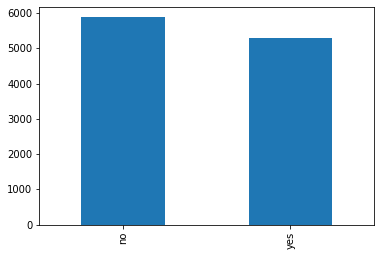

In [140]:
eda = df.deposit.value_counts()
eda.plot.bar()

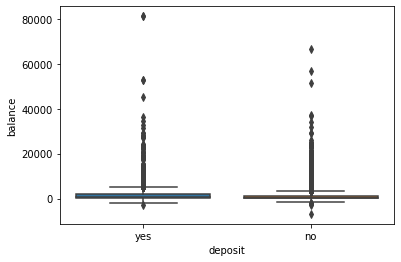

In [141]:
eda = df[['balance', 'deposit']]
sns.boxplot(x="deposit", y="balance", data=eda)

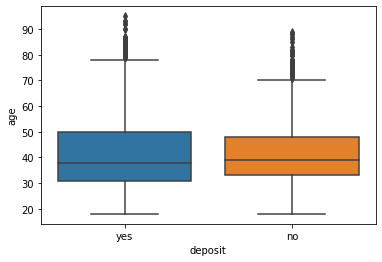

In [142]:
eda = df[['age', 'deposit']]
sns.boxplot(x="deposit", y="age", data=eda)

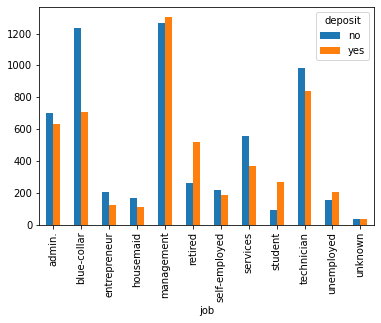

In [143]:
eda = df[['deposit', 'job']]
eda = pd.crosstab(eda['job'], eda['deposit'])
eda.plot.bar(stacked=False)

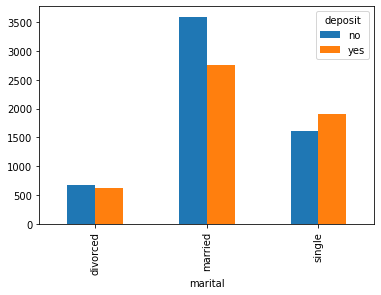

In [144]:
eda = df[['deposit', 'marital']]
eda = pd.crosstab(eda['marital'], eda['deposit'])
eda.plot.bar(stacked=False)

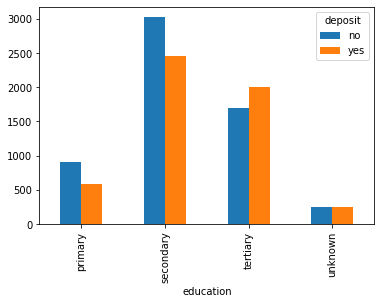

In [145]:
eda = df[['deposit', 'education']]
eda = pd.crosstab(eda['education'], eda['deposit'])
eda.plot.bar(stacked=False)

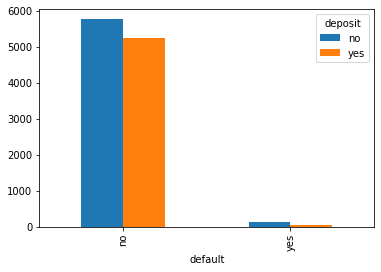

In [146]:
eda = df[['deposit', 'default']]
eda = pd.crosstab(eda['default'], eda['deposit'])
eda.plot.bar(stacked=False)

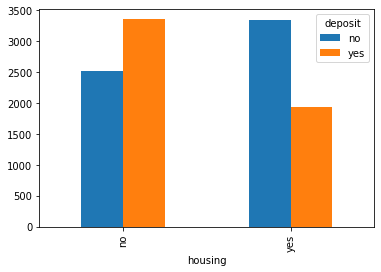

In [147]:
eda = df[['deposit', 'housing']]
eda = pd.crosstab(eda['housing'], eda['deposit'])
eda.plot.bar(stacked=False)

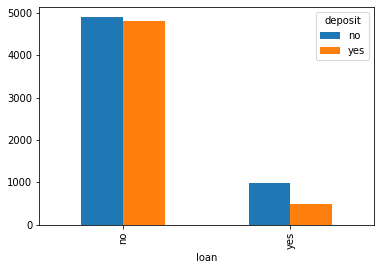

In [148]:
eda = df[['deposit', 'loan']]
eda = pd.crosstab(eda['loan'], eda['deposit'])
eda.plot.bar(stacked=False)

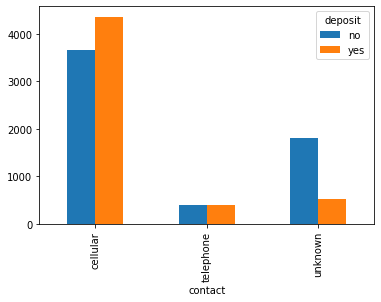

In [149]:
eda = df[['deposit', 'contact']]
eda = pd.crosstab(eda['contact'], eda['deposit'])
eda.plot.bar(stacked=False)

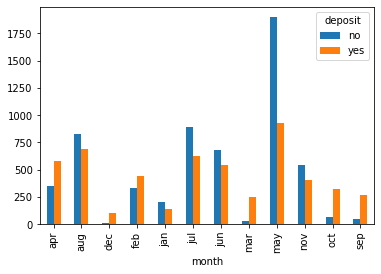

In [150]:
eda = df[['deposit', 'month']]
eda = pd.crosstab(eda['month'], eda['deposit'])
eda.plot.bar(stacked=False)

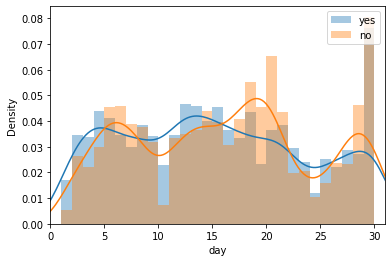

In [151]:
eda = df[['deposit', 'day']]
eda_y = eda.loc[eda.deposit == 'yes'].day
eda_n = eda.loc[eda.deposit == 'no'].day
fig, ax = plt.subplots()
sns.distplot(eda_y, bins=range(1, 31, 1), ax=ax, kde=True, label='yes')
sns.distplot(eda_n, bins=range(1, 31, 1), ax=ax, kde=True, label='no')
ax.set_xlim([0, 31])
plt.legend(loc='upper right')

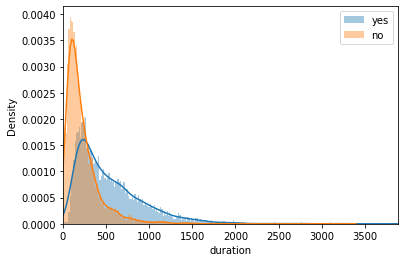

In [152]:
eda = df[['deposit', 'duration']]
eda_y = eda.loc[eda.deposit == 'yes'].duration
eda_n = eda.loc[eda.deposit == 'no'].duration
fig, ax = plt.subplots()
sns.distplot(eda_y, bins=range(1, 3881, 15), ax=ax, kde=True, label='yes')
sns.distplot(eda_n, bins=range(1, 3881, 15), ax=ax, kde=True, label='no')
ax.set_xlim([0, 3881])
plt.legend(loc='upper right')

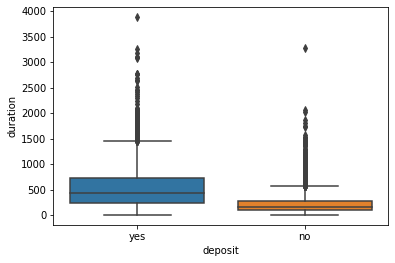

In [153]:
eda = df[['duration', 'deposit']]
sns.boxplot(x="deposit", y="duration", data=eda)

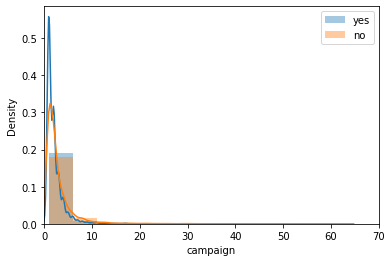

In [154]:
eda = df[['deposit', 'campaign']]
eda_y = eda.loc[eda.deposit == 'yes'].campaign
eda_n = eda.loc[eda.deposit == 'no'].campaign
fig, ax = plt.subplots()
sns.distplot(eda_y, bins=range(1, 70, 5), ax=ax, kde=True, label='yes')
sns.distplot(eda_n, bins=range(1, 70, 5), ax=ax, kde=True, label='no')
ax.set_xlim([0, 70])
plt.legend(loc='upper right')

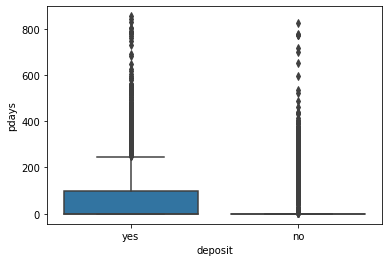

In [155]:
eda = df[['pdays', 'deposit']]
sns.boxplot(x="deposit", y="pdays", data=eda)

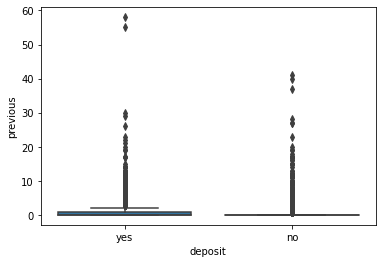

In [156]:
eda = df[['previous', 'deposit']]
sns.boxplot(x="deposit", y="previous", data=eda)

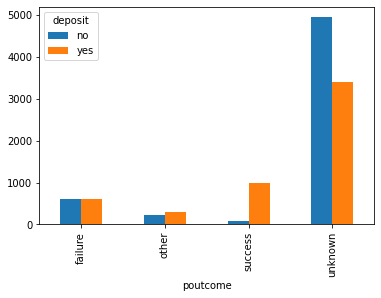

In [157]:
eda = df[['deposit', 'poutcome']]
eda = pd.crosstab(eda['poutcome'], eda['deposit'])
eda.plot.bar(stacked=False)

In [158]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [159]:
def isSuccessPrevious(x):
  if x == 'success':
    return 1
  else:
    return 0
df['isPrevSuccess'] = df.poutcome.apply(isSuccessPrevious)

In [160]:
def isBlueCollar(x):
  if x == 'blue-collar':
    return 1
  else:
    return 0
def isRetired(x):
  if x == 'retired':
    return 1
  else:
    return 0
df['bluecollar'] = df.job.apply(isBlueCollar)
df['retired'] = df.job.apply(isRetired)

In [161]:
def isContactedinMay(x):
  if x == 'may':
    return 1
  else:
    return 0
def isContactedinEndYear(x):
  if x in ['sep', 'oct', 'nov', 'dec']:
    return 1
  else:
    return 0
df['contactinmay'] = df.month.apply(isContactedinMay)
df['contactinendyear'] = df.month.apply(isContactedinEndYear)

In [162]:
def longduration(x):
  if x>=500:
    return 1
  else:
    return 0
df['isLongDuration'] = df.duration.apply(longduration)

In [163]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,isPrevSuccess,bluecollar,retired,contactinmay,contactinendyear,isLongDuration
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0,0,0,1,0,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0,0,0,1,0,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,0,0,0,1,0,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0,0,0,1,0,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0,0,0,1,0,1


In [164]:
!pip install category_encoders

In [165]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df[['age', 'day','duration', 'balance',
    'pdays', 'campaign', 'previous']] = sc.fit_transform(df[['age','day',
                                                             'duration', 
                                                             'balance',
                                                             'pdays',
                                                             'campaign',
                                                             'previous']])

In [166]:
x_columns = ['age',
             'job',
             'marital',
             'education',
             'default',
             'housing',
             'balance',
             'month',
             'loan',
             'day',
             'duration',
             'campaign',
             'pdays',
             'previous',
             'poutcome',
             'isPrevSuccess',
             'bluecollar',
             'retired',
             'contactinmay',
             'contactinendyear',
             'isLongDuration'
             ]

In [167]:
X = df[x_columns]
y = df.deposit.map({'yes':1, 'no':0})
print(X.shape)

(11162, 21)


In [168]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

enc = LeaveOneOutEncoder(cols=['job',
                          'marital',
                          'education',
                          'housing',
                          'loan',
                          'default',
                          'poutcome',
                          'month'])
X = enc.fit_transform(X,y)
print(X.shape)

(11162, 21)


In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
log_reg = LogisticRegression()
svm = SVC(kernel='rbf', probability=True)
dec_tree = DecisionTreeClassifier()
gau_nb = GaussianNB(var_smoothing=0.0001)
rfc = RandomForestClassifier(n_estimators=150)
knn = KNeighborsClassifier(n_neighbors=5)
grad_bos = GradientBoostingClassifier()

In [172]:
svm.fit(X_train, y_train)
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
gau_nb.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
grad_bos.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [173]:
print(f'svm score : {svm.score(X_test,y_test)}')
print(f'random forest score : {rfc.score(X_test,y_test)}')
print(f'KNN score : {knn.score(X_test,y_test)}')
print(f'DecisionTree score : {dec_tree.score(X_test,y_test)}')
print(f'Gaussian NB score : {gau_nb.score(X_test,y_test)}')
print(f'Logistic Regression score : {log_reg.score(X_test,y_test)}')
print(f'Gradient Boosting score : {grad_bos.score(X_test,y_test)}')

svm score : 0.8213166144200627
random forest score : 1.0
KNN score : 0.7801164352888491
DecisionTree score : 1.0
Gaussian NB score : 0.7769816390506046
Logistic Regression score : 0.8020600089565607
Gradient Boosting score : 1.0


In [174]:
y_pred_svm = svm.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_gau_nb = gau_nb.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_grad_bos = grad_bos.predict(X_test)

In [175]:
print(f'F Score of SVM : {f1_score(y_test, y_pred_svm)}')
print(f'F Score of RFC: {f1_score(y_test, y_pred_rfc)}')
print(f'F Score of KNN : {f1_score(y_test, y_pred_knn)}')
print(f'F Score of DECTREE : {f1_score(y_test, y_pred_dec_tree)}')
print(f'F Score of GAUSNB : {f1_score(y_test, y_pred_gau_nb)}')
print(f'F Score of LOGREG : {f1_score(y_test, y_pred_log_reg)}')
print(f'F Score of GRADBOS : {f1_score(y_test, y_pred_grad_bos)}')

F Score of SVM : 0.8146771946121689
F Score of RFC: 1.0
F Score of KNN : 0.7649593106749641
F Score of DECTREE : 1.0
F Score of GAUSNB : 0.7497487437185929
F Score of LOGREG : 0.7858527131782945
F Score of GRADBOS : 1.0


In [176]:
from sklearn.model_selection import cross_val_score

print(f'CV Score of SVM : {cross_val_score(svm, X_train, y_train, cv=3)}')
print(f'CV Score of RFC: {cross_val_score(rfc, X_train, y_train, cv=3)}')
print(f'CV Score of KNN : {cross_val_score(knn, X_train, y_train, cv=3)}')
print(f'CV Score of DECTREE : {cross_val_score(dec_tree, X_train, y_train, cv=3)}')
print(f'CV Score of GAUSNB : {cross_val_score(gau_nb, X_train, y_train, cv=3)}')
print(f'CV Score of LOGREG : {cross_val_score(log_reg, X_train, y_train, cv=3)}')
print(f'CV Score of GRADBOS : {cross_val_score(grad_bos, X_train, y_train, cv=3)}')

CV Score of SVM : [0.83003023 0.82392473 0.82694892]
CV Score of RFC: [1. 1. 1.]
CV Score of KNN : [0.80181391 0.7906586  0.79133065]
CV Score of DECTREE : [1. 1. 1.]
CV Score of GAUSNB : [0.7819953  0.77755376 0.78427419]
CV Score of LOGREG : [0.81961706 0.81317204 0.81014785]
CV Score of GRADBOS : [1. 1. 1.]


In [182]:
print(classification_report(y_test, y_pred_dec_tree))
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1166
           1       1.00      1.00      1.00      1067

    accuracy                           1.00      2233
   macro avg       1.00      1.00      1.00      2233
weighted avg       1.00      1.00      1.00      2233

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1166
           1       0.81      0.82      0.81      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



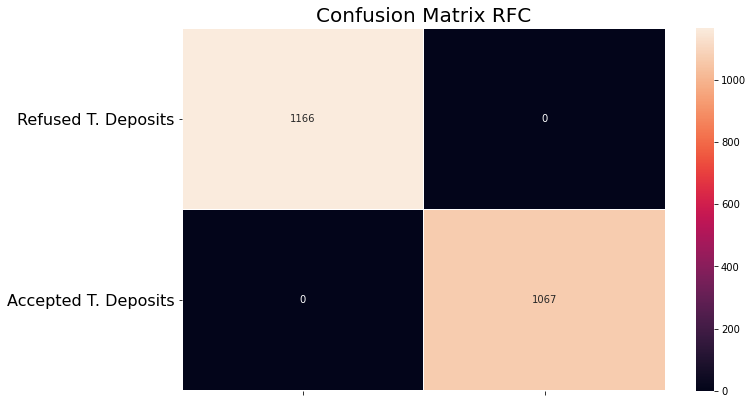

In [177]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix RFC", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

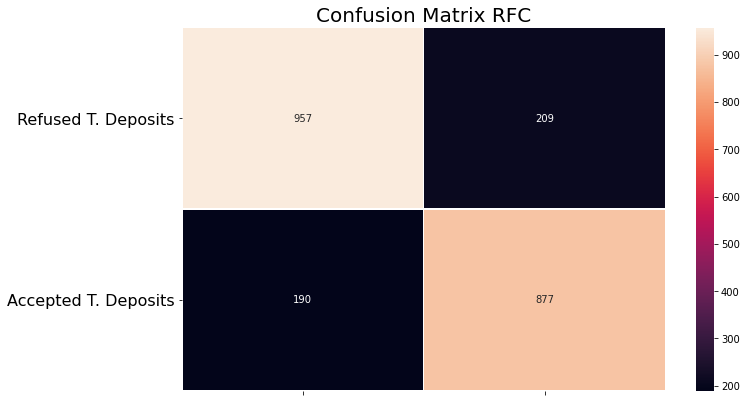

In [178]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix RFC", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

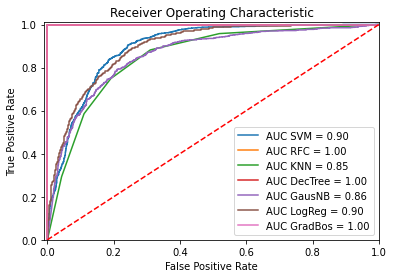

In [179]:
from sklearn import metrics

y_pred_svm_proba = svm.predict_proba(X_test)
y_pred_rfc_proba = rfc.predict_proba(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)
y_pred_dec_tree_proba = dec_tree.predict_proba(X_test)
y_pred_gau_nb_proba = gau_nb.predict_proba(X_test)
y_pred_log_reg_proba = log_reg.predict_proba(X_test)
y_pred_grad_bos_proba = grad_bos.predict_proba(X_test)

y_preds_svm = y_pred_svm_proba[:,1]
y_preds_rfc = y_pred_rfc_proba[:,1]
y_preds_knn = y_pred_knn_proba[:,1]
y_preds_dectree = y_pred_dec_tree_proba[:,1]
y_preds_gaunb = y_pred_gau_nb_proba[:,1]
y_preds_logreg = y_pred_log_reg_proba[:,1]
y_preds_gradbos = y_pred_grad_bos_proba[:,1]

fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, y_preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_rfc, tpr_rfc, threshold = metrics.roc_curve(y_test, y_preds_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
fpr_knn, tpr_knn, threshold = metrics.roc_curve(y_test, y_preds_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_dectree, tpr_dectree, threshold = metrics.roc_curve(y_test, y_preds_dectree)
roc_auc_dectree = metrics.auc(fpr_dectree, tpr_dectree)
fpr_gaunb, tpr_gaunb, threshold = metrics.roc_curve(y_test, y_preds_gaunb)
roc_auc_gaunb = metrics.auc(fpr_gaunb, tpr_gaunb)
fpr_logreg, tpr_logreg, threshold = metrics.roc_curve(y_test, y_preds_logreg)
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)
fpr_gradbos, tpr_gradbos, threshold = metrics.roc_curve(y_test, y_preds_gradbos)
roc_auc_grabos = metrics.auc(fpr_gradbos, tpr_gradbos)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_rfc, tpr_rfc, label = 'AUC RFC = %0.2f' % roc_auc_rfc)
plt.plot(fpr_knn, tpr_knn, label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_dectree, tpr_dectree, label = 'AUC DecTree = %0.2f' % roc_auc_dectree)
plt.plot(fpr_gaunb, tpr_gaunb, label = 'AUC GausNB = %0.2f' % roc_auc_gaunb)
plt.plot(fpr_logreg, tpr_logreg, label = 'AUC LogReg = %0.2f' % roc_auc_logreg)
plt.plot(fpr_gradbos, tpr_gradbos, label = 'AUC GradBos = %0.2f' % roc_auc_grabos)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()